In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import collections
%matplotlib inline

from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# Raw DataFrame

In [2]:
# read in the Chicagov Divvy Bicycle Sharing Data csv files from Kaggle
pd.set_option('display.max_columns', 30)
filename = 'data.csv'
df = pd.read_csv(filename)
df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,10.066667,68.0,tstorms,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,4.383333,68.0,tstorms,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,2.100000,68.0,tstorms,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,58.016667,68.0,tstorms,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,10.633333,68.0,tstorms,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [3]:
# show column types and if there are any null values present
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495235 entries, 0 to 9495234
Data columns (total 23 columns):
trip_id              9495235 non-null int64
year                 9495235 non-null int64
month                9495235 non-null int64
week                 9495235 non-null int64
day                  9495235 non-null int64
hour                 9495235 non-null int64
usertype             9495235 non-null object
gender               9495235 non-null object
starttime            9495235 non-null object
stoptime             9495235 non-null object
tripduration         9495235 non-null float64
temperature          9495235 non-null float64
events               9495235 non-null object
from_station_id      9495235 non-null int64
from_station_name    9495235 non-null object
latitude_start       9495235 non-null float64
longitude_start      9495235 non-null float64
dpcapacity_start     9495235 non-null float64
to_station_id        9495235 non-null int64
to_station_name      9495235 non-nu

# Data Cleaning and Wrangling

### Trip ID Column

In [4]:
# check for unique trip_ids
df.trip_id.value_counts();

In [5]:
# look at one instance of trip_id where there are duplicate rows
df[df['trip_id']==11693784]

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
5250863,11693784,2016,9,35,6,12,Subscriber,Male,2016-09-04 12:06:52,2016-09-04 12:12:57,6.1,78.1,cloudy,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19.0,117,Wilton Ave & Belmont Ave,41.94018,-87.65304,23.0
5250864,11693784,2016,9,35,6,12,Subscriber,Male,2016-09-04 12:06:52,2016-09-04 12:12:57,6.1,78.1,cloudy,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19.0,117,Wilton Ave & Belmont Ave,41.94018,-87.65304,23.0


In [6]:
# since there were some trip_ids with more than one count, determine the count of unique rows
df.trip_id.nunique()

9495188

In [7]:
# drop rows with duplicate data 
data = df.copy()
data = data.drop_duplicates().sort_values('trip_id')

In [8]:
# make sure the entries match our nunique count 
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9495188 entries, 576426 to 8911697
Data columns (total 23 columns):
trip_id              9495188 non-null int64
year                 9495188 non-null int64
month                9495188 non-null int64
week                 9495188 non-null int64
day                  9495188 non-null int64
hour                 9495188 non-null int64
usertype             9495188 non-null object
gender               9495188 non-null object
starttime            9495188 non-null object
stoptime             9495188 non-null object
tripduration         9495188 non-null float64
temperature          9495188 non-null float64
events               9495188 non-null object
from_station_id      9495188 non-null int64
from_station_name    9495188 non-null object
latitude_start       9495188 non-null float64
longitude_start      9495188 non-null float64
dpcapacity_start     9495188 non-null float64
to_station_id        9495188 non-null int64
to_station_name      9495188 n

In [9]:
# check each trip id has a single count
data.trip_id.value_counts();

The duplicate trip_ids have been dropped, so each trip_id is a unique event. There are 9495188 values in every column, and there are no null values. 

### General cleaning steps for easier use

In [10]:
# convert start and stop times to datetimes
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

In [11]:
# rename day column to numerical day of week
data = data.rename(columns={'day':'num_day_of_week'})

In [12]:
# create new column with the name of the week 
data['day_of_week'] = data['starttime'].dt.weekday_name

In [13]:
# create new column with numerical day of the month
data['day'] = data['starttime'].dt.day

In [14]:
# view tail of the data
pd.set_option('display.max_columns', 30)
data.tail()

,trip_id,year,month,week,num_day_of_week,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,day_of_week,day
8911701,17536695,2017,12,52,6,23,Subscriber,Male,2017-12-31 23:34:00,2017-12-31 23:39:00,5.016667,-0.9,clear,337,Clark St & Chicago Ave,41.896544,-87.630931,19.0,182,Wells St & Elm St,41.903222,-87.634324,23.0,Sunday,31
8911700,17536696,2017,12,52,6,23,Subscriber,Male,2017-12-31 23:41:00,2017-12-31 23:51:00,9.816667,-0.9,clear,93,Sheffield Ave & Willow St,41.913688,-87.652855,15.0,343,Racine Ave & Wrightwood Ave,41.928887,-87.658971,15.0,Sunday,31
8911699,17536697,2017,12,52,6,23,Subscriber,Male,2017-12-31 23:42:00,2017-12-31 23:47:00,4.533333,-0.9,clear,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,27.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,23.0,Sunday,31
8911698,17536698,2017,12,52,6,23,Subscriber,Male,2017-12-31 23:48:00,2017-12-31 23:53:00,5.250000,-0.9,clear,340,Clark St & Wrightwood Ave,41.929546,-87.643118,15.0,143,Sedgwick St & Webster Ave,41.922167,-87.638888,15.0,Sunday,31
8911697,17536701,2017,12,52,6,23,Subscriber,Male,2017-12-31 23:58:00,2018-01-01 00:03:00,4.733333,-0.9,clear,159,Claremont Ave & Hirsch St,41.907781,-87.685854,11.0,69,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0,Sunday,31


In [15]:
# sort columns
pd.set_option('display.max_columns', 30)
data = data[['trip_id','year','month','week','day','hour','num_day_of_week','day_of_week',
             'starttime','stoptime','tripduration','temperature','events','usertype','gender',
             'from_station_id','from_station_name','latitude_start','longitude_start','dpcapacity_start',
             'to_station_id','to_station_name','latitude_end','longitude_end','dpcapacity_end']]
data

,trip_id,year,month,week,day,hour,num_day_of_week,day_of_week,starttime,stoptime,tripduration,temperature,events,usertype,gender,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
576426,1109427,2014,1,1,1,1,2,Wednesday,2014-01-01 01:12:00,2014-01-01 01:18:00,5.766667,10.9,not clear,Subscriber,Male,240,Sheridan Rd & Irving Park Rd,41.954245,-87.654406,23.0,245,Clarendon Ave & Junior Ter,41.961004,-87.649603,15.0
576425,1109431,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.833333,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0
576424,1109432,2014,1,1,1,1,2,Wednesday,2014-01-01 01:43:00,2014-01-01 01:53:00,10.866667,10.9,not clear,Subscriber,Male,113,Bissell St & Armitage Ave,41.918440,-87.652220,15.0,94,Clark St & Armitage Ave,41.918306,-87.636282,19.0
576423,1109434,2014,1,1,1,1,2,Wednesday,2014-01-01 01:44:00,2014-01-01 01:59:00,15.266667,10.9,not clear,Subscriber,Male,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0
576422,1109435,2014,1,1,1,1,2,Wednesday,2014-01-01 01:45:00,2014-01-01 02:00:00,15.066667,10.9,not clear,Subscriber,Female,50,Clark St & Congress Pkwy,41.875933,-87.630585,27.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0
576421,1109439,2014,1,1,1,1,2,Wednesday,2014-01-01 01:49:00,2014-01-01 01:57:00,8.466667,10.9,not clear,Subscriber,Male,250,Ashland Ave & Wellington Ave,41.936083,-87.669807,19.0,115,Sheffield Ave & Wellington Ave,41.936253,-87.653566,23.0
576420,1109440,2014,1,1,1,1,2,Wednesday,2014-01-01 01:53:00,2014-01-01 02:00:00,7.033333,10.9,not clear,Subscriber,Male,213,Leavitt St & North Ave,41.910153,-87.682290,15.0,183,Damen Ave & Augusta Blvd,41.899714,-87.677234,15.0
576419,1109441,2014,1,1,1,1,2,Wednesday,2014-01-01 01:57:00,2014-01-01 02:08:00,10.316667,10.9,not clear,Subscriber,Male,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15.0,26,McClurg Ct & Illinois St,41.891020,-87.617300,31.0
576418,1109442,2014,1,1,1,1,2,Wednesday,2014-01-01 01:58:00,2014-01-01 02:05:00,7.166667,10.9,not clear,Subscriber,Male,141,Clark St & Lincoln Ave,41.915689,-87.634600,23.0,141,Clark St & Lincoln Ave,41.915689,-87.634600,23.0
576417,1109443,2014,1,1,1,1,2,Wednesday,2014-01-01 01:59:00,2014-01-01 02:06:00,7.466667,10.9,not clear,Subscriber,Male,141,Clark St & Lincoln Ave,41.915689,-87.634600,23.0,141,Clark St & Lincoln Ave,41.915689,-87.634600,23.0


### Location

In [16]:
# check maximum values to see if they are within reason with Chicago latitude and longitude
data[['latitude_start','longitude_start','latitude_end','longitude_end']].max()

latitude_start     42.064313
longitude_start   -87.549386
latitude_end       42.064313
longitude_end     -87.549386
dtype: float64

In [17]:
# check minimum values to see if they are within reason with Chicago latitude and longitude
data[['latitude_start','longitude_start','latitude_end','longitude_end']].min()

latitude_start     41.736646
longitude_start   -87.802870
latitude_end       41.736646
longitude_end     -87.802870
dtype: float64

### Capacity - departure

In [18]:
departures = data[['starttime','from_station_name','trip_id']].sort_values(['from_station_name','starttime'])
departures = departures.rename(columns={'starttime':'datetime','from_station_name':'station_name'})

In [19]:
# each departure is given a 1 value
departures['trip_counts'] = 1
departures.head()

,datetime,station_name,trip_id,trip_counts
2146213,2015-05-17 14:06:00,2112 W Peterson Ave,5199604,1
2140518,2015-05-18 10:47:00,2112 W Peterson Ave,5213095,1
2106692,2015-05-22 17:29:00,2112 W Peterson Ave,5276252,1
2078846,2015-05-27 15:53:00,2112 W Peterson Ave,5356250,1
2074568,2015-05-27 18:57:00,2112 W Peterson Ave,5361887,1


In [20]:
arrivals = data[['starttime','to_station_name','trip_id']].sort_values(['to_station_name','starttime'])
arrivals = arrivals.rename(columns={'starttime':'datetime','to_station_name':'station_name'})

In [21]:
# each arrivals is given a -1 value
arrivals['trip_counts'] = -1
arrivals.head()

,datetime,station_name,trip_id,trip_counts
2146845,2015-05-17 12:41:00,2112 W Peterson Ave,5197801,-1
2140550,2015-05-18 10:36:00,2112 W Peterson Ave,5212990,-1
2107385,2015-05-22 16:41:00,2112 W Peterson Ave,5274966,-1
2103078,2015-05-23 12:07:00,2112 W Peterson Ave,5284833,-1
2095211,2015-05-25 09:01:00,2112 W Peterson Ave,5317259,-1


In [22]:
departures_and_arrivals = pd.concat([departures, arrivals])
departures_and_arrivals = departures_and_arrivals.sort_values(['station_name','datetime'])
departures_and_arrivals['date'] = departures_and_arrivals['datetime'].dt.date
departures_and_arrivals = departures_and_arrivals[['datetime','date','station_name','trip_id','trip_counts']]
departures_and_arrivals.head()

,datetime,date,station_name,trip_id,trip_counts
2146845,2015-05-17 12:41:00,2015-05-17,2112 W Peterson Ave,5197801,-1
2146213,2015-05-17 14:06:00,2015-05-17,2112 W Peterson Ave,5199604,1
2140550,2015-05-18 10:36:00,2015-05-18,2112 W Peterson Ave,5212990,-1
2140518,2015-05-18 10:47:00,2015-05-18,2112 W Peterson Ave,5213095,1
2107385,2015-05-22 16:41:00,2015-05-22,2112 W Peterson Ave,5274966,-1


In [23]:
# get running sum of departures-arrivals
departures_and_arrivals['cumulative_sum'] = departures_and_arrivals.groupby(['station_name','date'])['trip_counts'].cumsum()
departures_and_arrivals.head()


,datetime,date,station_name,trip_id,trip_counts,cumulative_sum
2146845,2015-05-17 12:41:00,2015-05-17,2112 W Peterson Ave,5197801,-1,-1
2146213,2015-05-17 14:06:00,2015-05-17,2112 W Peterson Ave,5199604,1,0
2140550,2015-05-18 10:36:00,2015-05-18,2112 W Peterson Ave,5212990,-1,-1
2140518,2015-05-18 10:47:00,2015-05-18,2112 W Peterson Ave,5213095,1,0
2107385,2015-05-22 16:41:00,2015-05-22,2112 W Peterson Ave,5274966,-1,-1


In [24]:
# maximum departures-arrivals for each station 
max_sum = departures_and_arrivals.groupby('station_name')['cumulative_sum'].max().reset_index()
max_sum.head()

,station_name,cumulative_sum
0,2112 W Peterson Ave,5
1,63rd St Beach,4
2,900 W Harrison,16
3,900 W Harrison St,15
4,Aberdeen St & Jackson Blvd,16


In [25]:
# maximum capacity at each station
max_cap = data[['from_station_name','dpcapacity_start']].drop_duplicates().groupby('from_station_name').max()
max_cap.head()

,dpcapacity_start
from_station_name,
2112 W Peterson Ave,15.0
63rd St Beach,23.0
900 W Harrison,19.0
900 W Harrison St,19.0
Aberdeen St & Jackson Blvd,15.0


In [30]:
df_merge_all = pd.merge(departures_and_arrivals, max_cap, how='left', left_on='station_name',right_on='from_station_name')


In [31]:
df_merge_all = df_merge_all.groupby(['station_name','date'])[['cumulative_sum','dpcapacity_start']].max().reset_index()
df_merge_all.head()

,station_name,date,cumulative_sum,dpcapacity_start
0,2112 W Peterson Ave,2015-05-17,0,15.0
1,2112 W Peterson Ave,2015-05-18,0,15.0
2,2112 W Peterson Ave,2015-05-22,0,15.0
3,2112 W Peterson Ave,2015-05-23,-1,15.0
4,2112 W Peterson Ave,2015-05-25,-1,15.0


In [32]:
df_merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576538 entries, 0 to 576537
Data columns (total 4 columns):
station_name        576538 non-null object
date                576538 non-null object
cumulative_sum      576538 non-null int64
dpcapacity_start    576538 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.6+ MB


In [33]:
df_merge_all['difference'] = df_merge_all['dpcapacity_start'] - df_merge_all['cumulative_sum']

In [34]:
df_merge_all.head()

,station_name,date,cumulative_sum,dpcapacity_start,difference
0,2112 W Peterson Ave,2015-05-17,0,15.0,15.0
1,2112 W Peterson Ave,2015-05-18,0,15.0,15.0
2,2112 W Peterson Ave,2015-05-22,0,15.0,15.0
3,2112 W Peterson Ave,2015-05-23,-1,15.0,16.0
4,2112 W Peterson Ave,2015-05-25,-1,15.0,16.0


In [35]:
# show all stations that exceed capacity
df_negative = df_merge_all[df_merge_all['difference']<0]
df_negative.head()

,station_name,date,cumulative_sum,dpcapacity_start,difference
3982,Aberdeen St & Jackson Blvd,2017-09-25,16,15.0,-1.0
4254,Aberdeen St & Madison St,2014-07-02,20,19.0,-1.0
4320,Aberdeen St & Madison St,2014-09-06,32,19.0,-13.0
4321,Aberdeen St & Madison St,2014-09-07,23,19.0,-4.0
4322,Aberdeen St & Madison St,2014-09-08,24,19.0,-5.0


In [36]:
date_parts = df_negative['date'].astype('str').str.split('-',n = 2, expand = True)

In [37]:
df_negative['year'] = date_parts[0].str.lstrip("0")
df_negative['month'] = date_parts[1].str.lstrip("0")
df_negative['day'] = date_parts[2].str.lstrip("0")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [38]:
df_negative.head()

,station_name,date,cumulative_sum,dpcapacity_start,difference,year,month,day
3982,Aberdeen St & Jackson Blvd,2017-09-25,16,15.0,-1.0,2017,9,25
4254,Aberdeen St & Madison St,2014-07-02,20,19.0,-1.0,2014,7,2
4320,Aberdeen St & Madison St,2014-09-06,32,19.0,-13.0,2014,9,6
4321,Aberdeen St & Madison St,2014-09-07,23,19.0,-4.0,2014,9,7
4322,Aberdeen St & Madison St,2014-09-08,24,19.0,-5.0,2014,9,8


In [39]:
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 3982 to 572240
Data columns (total 8 columns):
station_name        6205 non-null object
date                6205 non-null object
cumulative_sum      6205 non-null int64
dpcapacity_start    6205 non-null float64
difference          6205 non-null float64
year                6205 non-null object
month               6205 non-null object
day                 6205 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 436.3+ KB


(array([2.00000e+00, 1.10000e+01, 6.70000e+01, 2.61000e+02, 5.56000e+02,
        1.06500e+03, 2.22920e+04, 4.74167e+05, 6.75860e+04, 1.05310e+04]),
 array([-116. ,  -98.8,  -81.6,  -64.4,  -47.2,  -30. ,  -12.8,    4.4,
          21.6,   38.8,   56. ]),
 <a list of 10 Patch objects>)

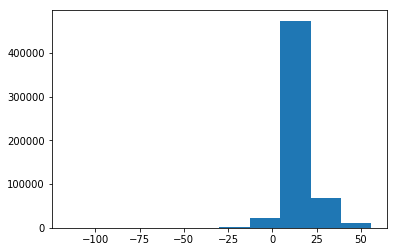

In [40]:
plt.hist(df_merge_all['difference'])

In [41]:
# number of unique station/dates that exceed capacity
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6205 entries, 3982 to 572240
Data columns (total 8 columns):
station_name        6205 non-null object
date                6205 non-null object
cumulative_sum      6205 non-null int64
dpcapacity_start    6205 non-null float64
difference          6205 non-null float64
year                6205 non-null object
month               6205 non-null object
day                 6205 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 436.3+ KB


In [42]:
# total number of unique station/dates
df_merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576538 entries, 0 to 576537
Data columns (total 5 columns):
station_name        576538 non-null object
date                576538 non-null object
cumulative_sum      576538 non-null int64
dpcapacity_start    576538 non-null float64
difference          576538 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 22.0+ MB


6205 out of 576538 unique stations and dates exceed capacity.

In [43]:
df_merge_all[df_merge_all['difference']<0]['station_name'].nunique()

221

## Departure Joined Dataframe

In [44]:
dfmodel = data.copy()

In [45]:
# dataframe for
dfmodel = pd.get_dummies(dfmodel, columns = ['events','usertype','gender'])

In [46]:
dfdmodel = dfmodel.groupby(['from_station_name','year','month','day','hour']).agg({'tripduration':'mean',
                                                                        'temperature':'mean'}).reset_index()
dfdmodel.head()

,from_station_name,year,month,day,hour,tripduration,temperature
0,2112 W Peterson Ave,2015,5,17,14,16.550000,81.0
1,2112 W Peterson Ave,2015,5,18,10,4.166667,75.0
2,2112 W Peterson Ave,2015,5,22,17,13.616667,60.1
3,2112 W Peterson Ave,2015,5,27,15,14.300000,71.1
4,2112 W Peterson Ave,2015,5,27,18,15.450000,72.0


In [47]:
dfdmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061061 entries, 0 to 4061060
Data columns (total 7 columns):
from_station_name    object
year                 int64
month                int64
day                  int64
hour                 int64
tripduration         float64
temperature          float64
dtypes: float64(2), int64(4), object(1)
memory usage: 216.9+ MB


#### event percentages

In [48]:
dfdevents = dfmodel.copy()
dfdevents = dfdevents[['from_station_name','year','month','day','hour','events_cloudy','events_clear','events_not clear','events_rain or snow','events_tstorms','events_unknown']]
dfdevents.head()

,from_station_name,year,month,day,hour,events_cloudy,events_clear,events_not clear,events_rain or snow,events_tstorms,events_unknown
576426,Sheridan Rd & Irving Park Rd,2014,1,1,1,0,0,1,0,0,0
576425,Bissell St & Armitage Ave,2014,1,1,1,0,0,1,0,0,0
576424,Bissell St & Armitage Ave,2014,1,1,1,0,0,1,0,0,0
576423,Clark St & Congress Pkwy,2014,1,1,1,0,0,1,0,0,0
576422,Clark St & Congress Pkwy,2014,1,1,1,0,0,1,0,0,0


In [49]:
dfdevents['sum'] = (dfdevents['events_cloudy'] +
                   dfdevents['events_clear'] +
                   dfdevents['events_not clear'] +
                   dfdevents['events_rain or snow'] + 
                   dfdevents['events_tstorms'] +
                   dfdevents['events_unknown'])

In [50]:
dfdevents = dfdevents.sort_values(['from_station_name','year','month','day','hour'])

In [51]:
dfdevents = dfdevents.groupby(['from_station_name','year','month','day','hour']).sum().reset_index()
dfdevents.head();

In [52]:
dfdevents['events_cloudy_pct'] = (dfdevents['events_cloudy'] / dfdevents['sum'])*100
dfdevents['events_clear_pct'] = (dfdevents['events_clear'] / dfdevents['sum'])*100
dfdevents['events_not clear_pct'] = (dfdevents['events_not clear'] / dfdevents['sum'])*100
dfdevents['events_rain or snow_pct'] = (dfdevents['events_rain or snow'] / dfdevents['sum'])*100
dfdevents['events_tstorms_pct'] = (dfdevents['events_tstorms'] / dfdevents['sum'])*100
dfdevents['events_unknown_pct'] = (dfdevents['events_unknown'] / dfdevents['sum'])*100

In [53]:
dfdevents_pct = dfdevents[['from_station_name','year','month','day','hour','events_cloudy_pct','events_clear_pct','events_not clear_pct','events_rain or snow_pct','events_tstorms_pct','events_unknown_pct']]
dfdevents_pct.head();

#### usertype percentage

In [54]:
dfdusertype = dfmodel.copy()
dfdusertype = dfdusertype[['from_station_name','year','month','day','hour','usertype_Customer','usertype_Dependent','usertype_Subscriber']]
dfdusertype.head();

In [55]:
dfdusertype['sum'] = (dfdusertype['usertype_Customer'] +
                   dfdusertype['usertype_Dependent'] +
                   dfdusertype['usertype_Subscriber'])

In [56]:
dfdusertype = dfdusertype.sort_values(['from_station_name','year','month','day','hour'])

In [57]:
dfdusertype = dfdusertype.groupby(['from_station_name','year','month','day','hour']).sum().reset_index()
dfdusertype.head();

In [58]:
dfdusertype['usertype_Customer_pct'] = (dfdusertype['usertype_Customer'] / dfdusertype['sum'])*100
dfdusertype['usertype_Dependent_pct'] = (dfdusertype['usertype_Dependent'] / dfdusertype['sum'])*100
dfdusertype['usertype_Subscriber_pct'] = (dfdusertype['usertype_Subscriber'] / dfdusertype['sum'])*100

In [59]:
dfdusertype_pct = dfdusertype[['from_station_name','year','month','day','hour','usertype_Customer_pct','usertype_Dependent_pct','usertype_Subscriber_pct']]
dfdusertype_pct.head();

#### gender percentages

In [60]:
dfdgender = dfmodel.copy()
dfdgender = dfdgender[['from_station_name','year','month','day','hour','gender_Female','gender_Male']]
dfdgender.head();

In [61]:
dfdgender['sum'] = (dfdgender['gender_Female'] + dfdgender['gender_Male'])

In [62]:
dfdgender = dfdgender.sort_values(['from_station_name','year','month','day','hour'])

In [63]:
dfdgender = dfdgender.groupby(['from_station_name','year','month','day','hour']).sum().reset_index()
dfdgender.head();

In [64]:
dfdgender['gender_Female_pct'] = (dfdgender['gender_Female'] / dfdgender['sum'])*100
dfdgender['gender_Male_pct'] = (dfdgender['gender_Male'] / dfdgender['sum'])*100

In [65]:
dfdgender_pct = dfdgender[['from_station_name','year','month','day','hour','gender_Female_pct','gender_Male_pct','sum']]
dfdgender_pct.head();

### Join

In [66]:
joindf = pd.merge(dfdmodel, dfdevents_pct, how='left',on=['from_station_name','year','month','day','hour'])

In [67]:
joindf = pd.merge(joindf, dfdusertype_pct, how='left', on=['from_station_name','year','month','day','hour'])

In [68]:
departure_joindf = pd.merge(joindf, dfdgender_pct, how='left', on=['from_station_name','year','month','day','hour'])

In [69]:
departure_joindf = departure_joindf.rename(columns={'sum':'trip_count'})

In [70]:
departure_joindf['year'] = departure_joindf['year'].astype(str)
departure_joindf['month'] = departure_joindf['month'].astype(str)
departure_joindf['day'] = departure_joindf['day'].astype(str)

In [71]:
departure_joindf.head()

,from_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,events_unknown_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count
0,2112 W Peterson Ave,2015,5,17,14,16.550000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1
1,2112 W Peterson Ave,2015,5,18,10,4.166667,75.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
2,2112 W Peterson Ave,2015,5,22,17,13.616667,60.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
3,2112 W Peterson Ave,2015,5,27,15,14.300000,71.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
4,2112 W Peterson Ave,2015,5,27,18,15.450000,72.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1


In [72]:
departure_joindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4061061 entries, 0 to 4061060
Data columns (total 19 columns):
from_station_name          object
year                       object
month                      object
day                        object
hour                       int64
tripduration               float64
temperature                float64
events_cloudy_pct          float64
events_clear_pct           float64
events_not clear_pct       float64
events_rain or snow_pct    float64
events_tstorms_pct         float64
events_unknown_pct         float64
usertype_Customer_pct      float64
usertype_Dependent_pct     float64
usertype_Subscriber_pct    float64
gender_Female_pct          float64
gender_Male_pct            float64
trip_count                 uint8
dtypes: float64(13), int64(1), object(4), uint8(1)
memory usage: 592.6+ MB


In [73]:
depjoindf = pd.merge(departure_joindf, df_negative, how='outer',
                     left_on=['from_station_name','year','month','day'], 
                     right_on=['station_name','year','month','day'], indicator=True).query('_merge == "left_only"').drop('_merge', 1)
depjoindf.head()

,from_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,events_unknown_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,station_name,date,cumulative_sum,dpcapacity_start,difference
0,2112 W Peterson Ave,2015,5,17,14,16.550000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1,NaN,NaN,NaN,NaN,NaN
1,2112 W Peterson Ave,2015,5,18,10,4.166667,75.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
2,2112 W Peterson Ave,2015,5,22,17,13.616667,60.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
3,2112 W Peterson Ave,2015,5,27,15,14.300000,71.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN
4,2112 W Peterson Ave,2015,5,27,18,15.450000,72.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1,NaN,NaN,NaN,NaN,NaN


In [74]:
depjoindf = depjoindf.drop(['station_name','date','cumulative_sum','dpcapacity_start','difference'],axis=1)

## Arrival Joined Dataframe

In [75]:
dfmodel_end = dfmodel.drop(columns=['year','month','day','hour'])

In [76]:
dfmodel_end['year'] = dfmodel_end.stoptime.dt.year
dfmodel_end['month'] = dfmodel_end.stoptime.dt.month
dfmodel_end['day'] = dfmodel_end.stoptime.dt.day
dfmodel_end['hour'] = dfmodel_end.stoptime.dt.hour

In [77]:
dfamodel = dfmodel_end.groupby(['to_station_name','year','month','day','hour']).agg({'tripduration':'mean',
                                                                                  'temperature':'mean'}).reset_index()
dfamodel.head()

,to_station_name,year,month,day,hour,tripduration,temperature
0,2112 W Peterson Ave,2015,5,17,13,25.916667,77.0
1,2112 W Peterson Ave,2015,5,18,10,9.600000,75.0
2,2112 W Peterson Ave,2015,5,22,16,11.850000,62.1
3,2112 W Peterson Ave,2015,5,23,12,13.333333,75.9
4,2112 W Peterson Ave,2015,5,25,9,18.300000,69.1


In [78]:
dfamodel.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013401 entries, 0 to 4013400
Data columns (total 7 columns):
to_station_name    4013401 non-null object
year               4013401 non-null int64
month              4013401 non-null int64
day                4013401 non-null int64
hour               4013401 non-null int64
tripduration       4013401 non-null float64
temperature        4013401 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 214.3+ MB


#### event percentages

In [79]:
dfaevents = dfmodel_end.copy()
dfaevents = dfaevents[['to_station_name','year','month','day','hour','events_cloudy','events_clear','events_not clear','events_rain or snow','events_tstorms','events_unknown']]
dfaevents.head()

,to_station_name,year,month,day,hour,events_cloudy,events_clear,events_not clear,events_rain or snow,events_tstorms,events_unknown
576426,Clarendon Ave & Junior Ter,2014,1,1,1,0,0,1,0,0,0
576425,Clark St & Armitage Ave,2014,1,1,1,0,0,1,0,0,0
576424,Clark St & Armitage Ave,2014,1,1,1,0,0,1,0,0,0
576423,Peoria St & Jackson Blvd,2014,1,1,1,0,0,1,0,0,0
576422,Peoria St & Jackson Blvd,2014,1,1,2,0,0,1,0,0,0


In [80]:
dfaevents['sum'] = (dfaevents['events_cloudy'] +
                   dfaevents['events_clear'] +
                   dfaevents['events_not clear'] +
                   dfaevents['events_rain or snow'] + 
                   dfaevents['events_tstorms'] +
                   dfaevents['events_unknown'])

In [81]:
dfaevents = dfaevents.sort_values(['to_station_name','year','month','day','hour'])

In [82]:
dfaevents = dfaevents.groupby(['to_station_name','year','month','day','hour']).sum().reset_index()
dfaevents.head();

In [83]:
dfaevents['events_cloudy_pct'] = (dfaevents['events_cloudy'] / dfaevents['sum'])*100
dfaevents['events_clear_pct'] = (dfaevents['events_clear'] / dfaevents['sum'])*100
dfaevents['events_not clear_pct'] = (dfaevents['events_not clear'] / dfaevents['sum'])*100
dfaevents['events_rain or snow_pct'] = (dfaevents['events_rain or snow'] / dfaevents['sum'])*100
dfaevents['events_tstorms_pct'] = (dfaevents['events_tstorms'] / dfaevents['sum'])*100
dfaevents['events_unknown_pct'] = (dfaevents['events_unknown'] / dfaevents['sum'])*100

In [84]:
dfaevents_pct = dfaevents[['to_station_name','year','month','day','hour','events_cloudy_pct','events_clear_pct','events_not clear_pct','events_rain or snow_pct','events_tstorms_pct','events_unknown_pct']]
dfaevents_pct.head();

#### usertype percentage

In [85]:
dfausertype = dfmodel_end.copy()
dfausertype = dfausertype[['to_station_name','year','month','day','hour','usertype_Customer','usertype_Dependent','usertype_Subscriber']]
dfausertype.head();

In [86]:
dfausertype['sum'] = (dfausertype['usertype_Customer'] +
                   dfausertype['usertype_Dependent'] +
                   dfausertype['usertype_Subscriber'])

In [87]:
dfausertype = dfausertype.sort_values(['to_station_name','year','month','day','hour'])

In [88]:
dfausertype = dfausertype.groupby(['to_station_name','year','month','day','hour']).sum().reset_index()
dfausertype.head();

In [89]:
dfausertype['usertype_Customer_pct'] = (dfausertype['usertype_Customer'] / dfausertype['sum'])*100
dfausertype['usertype_Dependent_pct'] = (dfausertype['usertype_Dependent'] / dfausertype['sum'])*100
dfausertype['usertype_Subscriber_pct'] = (dfausertype['usertype_Subscriber'] / dfausertype['sum'])*100

In [90]:
dfausertype_pct = dfausertype[['to_station_name','year','month','day','hour','usertype_Customer_pct','usertype_Dependent_pct','usertype_Subscriber_pct']]
dfausertype_pct.head();

#### gender percentages

In [91]:
dfagender = dfmodel_end.copy()
dfagender = dfagender[['to_station_name','year','month','day','hour','gender_Female','gender_Male']]
dfagender.head();

In [92]:
dfagender['sum'] = (dfagender['gender_Female'] +dfagender['gender_Male'])

In [93]:
dfagender = dfagender.sort_values(['to_station_name','year','month','day','hour'])

In [94]:
dfagender = dfagender.groupby(['to_station_name','year','month','day','hour']).sum().reset_index()
dfagender.head();

In [95]:
dfagender['gender_Female_pct'] = (dfagender['gender_Female'] / dfagender['sum'])*100
dfagender['gender_Male_pct'] = (dfagender['gender_Male'] / dfagender['sum'])*100

In [96]:
dfagender_pct = dfagender[['to_station_name','year','month','day','hour','gender_Female_pct','gender_Male_pct','sum']]
dfagender_pct.head()

,to_station_name,year,month,day,hour,gender_Female_pct,gender_Male_pct,sum
0,2112 W Peterson Ave,2015,5,17,13,100.0,0.0,1
1,2112 W Peterson Ave,2015,5,18,10,0.0,100.0,1
2,2112 W Peterson Ave,2015,5,22,16,0.0,100.0,1
3,2112 W Peterson Ave,2015,5,23,12,0.0,100.0,1
4,2112 W Peterson Ave,2015,5,25,9,100.0,0.0,1


### Join

In [97]:
joindf = pd.merge(dfamodel, dfaevents_pct, how='left',on=['to_station_name','year','month','day','hour'])

In [98]:
joindf = pd.merge(joindf, dfausertype_pct, how='left', on=['to_station_name','year','month','day','hour'])

In [99]:
arrival_joindf = pd.merge(joindf, dfagender_pct, how='left', on=['to_station_name','year','month','day','hour'])

In [100]:
arrival_joindf = arrival_joindf.rename(columns={'sum':'trip_count'})

In [101]:
arrival_joindf['year'] = arrival_joindf['year'].astype(str)
arrival_joindf['month'] = arrival_joindf['month'].astype(str)
arrival_joindf['day'] = arrival_joindf['day'].astype(str)

In [102]:
arrival_joindf.head()

,to_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,events_unknown_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count
0,2112 W Peterson Ave,2015,5,17,13,25.916667,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1
1,2112 W Peterson Ave,2015,5,18,10,9.600000,75.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
2,2112 W Peterson Ave,2015,5,22,16,11.850000,62.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
3,2112 W Peterson Ave,2015,5,23,12,13.333333,75.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
4,2112 W Peterson Ave,2015,5,25,9,18.300000,69.1,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1


In [103]:
arrjoindf = pd.merge(arrival_joindf, df_negative, how='outer',
                     left_on=['to_station_name','year','month','day'], 
                     right_on=['station_name','year','month','day'], indicator=True).query('_merge == "left_only"').drop('_merge', 1)
arrjoindf.head()

,to_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,events_unknown_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count,station_name,date,cumulative_sum,dpcapacity_start,difference
0,2112 W Peterson Ave,2015,5,17,13.0,25.916667,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2112 W Peterson Ave,2015,5,18,10.0,9.600000,75.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2112 W Peterson Ave,2015,5,22,16.0,11.850000,62.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2112 W Peterson Ave,2015,5,23,12.0,13.333333,75.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2112 W Peterson Ave,2015,5,25,9.0,18.300000,69.1,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN


In [104]:
arrjoindf = arrjoindf.drop(['station_name','date','cumulative_sum','dpcapacity_start','difference'],axis=1)

In [105]:
arrjoindf.head()

,to_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,events_unknown_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count
0,2112 W Peterson Ave,2015,5,17,13.0,25.916667,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1.0
1,2112 W Peterson Ave,2015,5,18,10.0,9.600000,75.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1.0
2,2112 W Peterson Ave,2015,5,22,16.0,11.850000,62.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1.0
3,2112 W Peterson Ave,2015,5,23,12.0,13.333333,75.9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1.0
4,2112 W Peterson Ave,2015,5,25,9.0,18.300000,69.1,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1.0


# Linear Modeling - departures

In [106]:
depjoindf.head()

,from_station_name,year,month,day,hour,tripduration,temperature,events_cloudy_pct,events_clear_pct,events_not clear_pct,events_rain or snow_pct,events_tstorms_pct,events_unknown_pct,usertype_Customer_pct,usertype_Dependent_pct,usertype_Subscriber_pct,gender_Female_pct,gender_Male_pct,trip_count
0,2112 W Peterson Ave,2015,5,17,14,16.550000,81.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,1
1,2112 W Peterson Ave,2015,5,18,10,4.166667,75.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
2,2112 W Peterson Ave,2015,5,22,17,13.616667,60.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
3,2112 W Peterson Ave,2015,5,27,15,14.300000,71.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1
4,2112 W Peterson Ave,2015,5,27,18,15.450000,72.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,1


In [107]:
# one hot encoding
depjoindf1 = pd.get_dummies(depjoindf, columns = ['from_station_name'])

In [108]:
feature_headers = depjoindf1[depjoindf1['year'].isin(['2014','2015','2016'])].drop(['trip_count'], axis=1).columns
target_headers = 'trip_count'


In [109]:
# linear model using the numerical day of week, the numerical mapping of events, trip duration, and temperature
X_train = depjoindf1[depjoindf1['year'].isin(['2015','2016'])].drop(['trip_count'], axis=1).values
X_test = depjoindf1[depjoindf1['year'] == '2017'].drop(['trip_count'], axis=1).values
y_train = depjoindf1[depjoindf1['year'].isin(['2015','2016'])]['trip_count'].values
y_test = depjoindf1[depjoindf1['year'] == '2017']['trip_count'].values

In [110]:
lm = linear_model.LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
#y_pred = lm.predict(X_test)

In [ ]:
#errors = abs(y_pred - y_test)

In [ ]:
#print('Mean Absolute Error: {}'.format(round(np.mean(errors), 2)), \
 #           'Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),\
  #          'R^2 (Score): {}'.format(lm.score(X_test, y_test)))